In [2]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score as CVS, train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
import datetime
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [3]:
data=pd.read_csv('D:/thesis/USA_traffic_accident/USA-MapQuest-census-streettype-resampled.csv',
                usecols=['Severity', 'Start_Lat', 'Start_Lng','Side', 
                         'Timezone','Temperature(F)', 'Humidity(%)', 'Pressure(in)','Visibility(mi)', 
                         'Wind_Direction', 'Wind_Speed(mph)','Precipitation(in)', 'Amenity', 'Bump', 'Crossing', 
                         'Give_Way','Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop','Traffic_Calming', 
                         'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight','Nautical_Twilight', 'Astronomical_Twilight', 
                         'Duration', 'Clear','Cloud', 'Rain', 'Heavy_Rain', 'Snow', 'Heavy_Snow', 'Fog', 
                         'Month','Weekday', 'Day', 'Hour', 'Minute', 'Precipitation_NA', 'Severity4',
    'Population_County', 'Drive_County', 'Transit_County', 'Walk_County','MedianHouseholdIncome_County', 
                         'Rd', 'St', 'Dr', 'Ave', 'Blvd', 'Ln', 'Pkwy', 'Hwy', 'Way', 'Ct', 'Pl', 'US-', 'Creek','Cir', 'Hill', 'Route', 'I-', 'Trl', 'Valley', 'Ridge', 'Pike', 'Fwy','River']
                )

In [4]:
data=data.drop(['Duration','Minute'],axis=1)

In [5]:
pd.set_option('display.max_columns', 1000)
data

,Severity,Start_Lat,Start_Lng,Side,Timezone,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Clear,Cloud,Rain,Heavy_Rain,Snow,Heavy_Snow,Fog,Month,Weekday,Day,Hour,Precipitation_NA,Severity4,Population_County,Drive_County,Transit_County,Walk_County,MedianHouseholdIncome_County,Rd,St,Dr,Ave,Blvd,Ln,Pkwy,Hwy,Way,Ct,Pl,US-,Creek,Cir,Hill,Route,I-,Trl,Valley,Ridge,Pike,Fwy,River
0,4,38.344051,-85.707352,R,US/Eastern,74.0,38.0,29.46,10.00,SW,16.0,0.00,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1,106,15,0,1,115702.0,85.3,0.7,0.9,54240.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,4,39.044456,-76.615692,R,US/Eastern,29.0,64.0,30.42,10.00,CALM,0.0,0.00,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,3,318,7,0,1,567696.0,79.8,3.4,2.4,97810.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,4,36.696083,-77.553009,R,US/Eastern,47.8,38.0,30.47,10.00,CALM,6.9,0.00,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,78,12,1,1,5381.0,76.5,0.9,3.0,30857.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,33.705238,-117.954430,R,US/Pacific,59.0,69.0,29.92,10.00,S,6.0,0.00,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,4,137,22,0,1,3164182.0,78.7,2.0,1.9,85398.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,39.866627,-76.698898,R,US/Eastern,74.0,91.0,29.56,7.00,CALM,0.0,0.04,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7,4,186,21,0,1,444014.0,84.4,0.8,1.6,63902.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,2,28.047333,-82.517433,R,US/Eastern,81.0,82.0,29.80,10.00,NW,8.0,0.00,False,False,False,False,False,False,False,False,False,False,False,True,Day,Day,Day,Day,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9,2,247,8,0,0,1378883.0,79.6,1.5,1.5,56137.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
79996,3,32.768742,-96.805511,R,US/Central,64.0,90.0,29.31,0.75,NW,9.0,0.46,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,0.0,0.0,1.0,1.0,0.0,0.0,0.0,5,2,128,5,0,0,2586552.0,78.6,2.8,1.5,56854.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
79997,3,33.255505,-111.948349,R,US/Mountain,95.0,32.0,28.56,10.00,N,5.0,0.00,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0,217,7,1,0,4253913.0,76.3,2.1,1.5,61606.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
79998,2,38.967590,-119.924103,R,US/Pacific,32.0,73.0,23.97,10.00,VAR,7.0,0.00,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12,0,364,22,0,0,47828.0,77.9,0.1,1.7,62503.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
data = data.replace([True, False], [1,0])
data = data.replace(['Day','Night'],[1,0])

In [7]:
data

,Severity,Start_Lat,Start_Lng,Side,Timezone,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Clear,Cloud,Rain,Heavy_Rain,Snow,Heavy_Snow,Fog,Month,Weekday,Day,Hour,Precipitation_NA,Severity4,Population_County,Drive_County,Transit_County,Walk_County,MedianHouseholdIncome_County,Rd,St,Dr,Ave,Blvd,Ln,Pkwy,Hwy,Way,Ct,Pl,US-,Creek,Cir,Hill,Route,I-,Trl,Valley,Ridge,Pike,Fwy,River
0,4,38.344051,-85.707352,R,US/Eastern,74.0,38.0,29.46,10.00,SW,16.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1,106,15,0,1,115702.0,85.3,0.7,0.9,54240.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,4,39.044456,-76.615692,R,US/Eastern,29.0,64.0,30.42,10.00,CALM,0.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,3,318,7,0,1,567696.0,79.8,3.4,2.4,97810.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,4,36.696083,-77.553009,R,US/Eastern,47.8,38.0,30.47,10.00,CALM,6.9,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,78,12,1,1,5381.0,76.5,0.9,3.0,30857.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,33.705238,-117.954430,R,US/Pacific,59.0,69.0,29.92,10.00,S,6.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,4,137,22,0,1,3164182.0,78.7,2.0,1.9,85398.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,39.866627,-76.698898,R,US/Eastern,74.0,91.0,29.56,7.00,CALM,0.0,0.04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7,4,186,21,0,1,444014.0,84.4,0.8,1.6,63902.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,2,28.047333,-82.517433,R,US/Eastern,81.0,82.0,29.80,10.00,NW,8.0,0.00,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9,2,247,8,0,0,1378883.0,79.6,1.5,1.5,56137.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
79996,3,32.768742,-96.805511,R,US/Central,64.0,90.0,29.31,0.75,NW,9.0,0.46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,5,2,128,5,0,0,2586552.0,78.6,2.8,1.5,56854.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
79997,3,33.255505,-111.948349,R,US/Mountain,95.0,32.0,28.56,10.00,N,5.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0,217,7,1,0,4253913.0,76.3,2.1,1.5,61606.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
79998,2,38.967590,-119.924103,R,US/Pacific,32.0,73.0,23.97,10.00,VAR,7.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12,0,364,22,0,0,47828.0,77.9,0.1,1.7,62503.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
# dataset为数据集  product_tags为需要编码的特征列(假设为第一列)
product_tags = ['Side','Timezone','Wind_Direction']
from sklearn.preprocessing import LabelEncoder
for col in product_tags:
    le = LabelEncoder()
    le.fit(data[col])
    data[col] = le.transform(data[col])

In [9]:
data

,Severity,Start_Lat,Start_Lng,Side,Timezone,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Clear,Cloud,Rain,Heavy_Rain,Snow,Heavy_Snow,Fog,Month,Weekday,Day,Hour,Precipitation_NA,Severity4,Population_County,Drive_County,Transit_County,Walk_County,MedianHouseholdIncome_County,Rd,St,Dr,Ave,Blvd,Ln,Pkwy,Hwy,Way,Ct,Pl,US-,Creek,Cir,Hill,Route,I-,Trl,Valley,Ridge,Pike,Fwy,River
0,4,38.344051,-85.707352,1,1,74.0,38.0,29.46,10.00,7,16.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1,106,15,0,1,115702.0,85.3,0.7,0.9,54240.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,4,39.044456,-76.615692,1,1,29.0,64.0,30.42,10.00,0,0.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,3,318,7,0,1,567696.0,79.8,3.4,2.4,97810.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,4,36.696083,-77.553009,1,1,47.8,38.0,30.47,10.00,0,6.9,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,78,12,1,1,5381.0,76.5,0.9,3.0,30857.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,33.705238,-117.954430,1,3,59.0,69.0,29.92,10.00,5,6.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,4,137,22,0,1,3164182.0,78.7,2.0,1.9,85398.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,39.866627,-76.698898,1,1,74.0,91.0,29.56,7.00,0,0.0,0.04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7,4,186,21,0,1,444014.0,84.4,0.8,1.6,63902.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,2,28.047333,-82.517433,1,1,81.0,82.0,29.80,10.00,4,8.0,0.00,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9,2,247,8,0,0,1378883.0,79.6,1.5,1.5,56137.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
79996,3,32.768742,-96.805511,1,0,64.0,90.0,29.31,0.75,4,9.0,0.46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,5,2,128,5,0,0,2586552.0,78.6,2.8,1.5,56854.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
79997,3,33.255505,-111.948349,1,2,95.0,32.0,28.56,10.00,2,5.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0,217,7,1,0,4253913.0,76.3,2.1,1.5,61606.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
79998,2,38.967590,-119.924103,1,3,32.0,73.0,23.97,10.00,8,7.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12,0,364,22,0,0,47828.0,77.9,0.1,1.7,62503.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
le.classes_  # 查看有哪些标签

array(['CALM', 'E', 'N', 'NE', 'NW', 'S', 'SE', 'SW', 'VAR', 'W'],
      dtype=object)

In [11]:
X=data.drop(['Severity4','Severity'],axis=1)
y=data.Severity4

In [12]:
X

,Start_Lat,Start_Lng,Side,Timezone,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Clear,Cloud,Rain,Heavy_Rain,Snow,Heavy_Snow,Fog,Month,Weekday,Day,Hour,Precipitation_NA,Population_County,Drive_County,Transit_County,Walk_County,MedianHouseholdIncome_County,Rd,St,Dr,Ave,Blvd,Ln,Pkwy,Hwy,Way,Ct,Pl,US-,Creek,Cir,Hill,Route,I-,Trl,Valley,Ridge,Pike,Fwy,River
0,38.344051,-85.707352,1,1,74.0,38.0,29.46,10.00,7,16.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1,106,15,0,115702.0,85.3,0.7,0.9,54240.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,39.044456,-76.615692,1,1,29.0,64.0,30.42,10.00,0,0.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,3,318,7,0,567696.0,79.8,3.4,2.4,97810.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,36.696083,-77.553009,1,1,47.8,38.0,30.47,10.00,0,6.9,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,78,12,1,5381.0,76.5,0.9,3.0,30857.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,33.705238,-117.954430,1,3,59.0,69.0,29.92,10.00,5,6.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,4,137,22,0,3164182.0,78.7,2.0,1.9,85398.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,39.866627,-76.698898,1,1,74.0,91.0,29.56,7.00,0,0.0,0.04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7,4,186,21,0,444014.0,84.4,0.8,1.6,63902.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,28.047333,-82.517433,1,1,81.0,82.0,29.80,10.00,4,8.0,0.00,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9,2,247,8,0,1378883.0,79.6,1.5,1.5,56137.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
79996,32.768742,-96.805511,1,0,64.0,90.0,29.31,0.75,4,9.0,0.46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,5,2,128,5,0,2586552.0,78.6,2.8,1.5,56854.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
79997,33.255505,-111.948349,1,2,95.0,32.0,28.56,10.00,2,5.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0,217,7,1,4253913.0,76.3,2.1,1.5,61606.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
79998,38.967590,-119.924103,1,3,32.0,73.0,23.97,10.00,8,7.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12,0,364,22,0,47828.0,77.9,0.1,1.7,62503.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
y[30]

1

In [14]:
X_train, X_test, y_train, y_test = TTS(X, y, test_size=0.30, random_state=710)

In [15]:

# 转换为Dataset数据格式
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# 参数
params = {
    'task': 'train',
    'boosting_type': 'gbdt',  # 设置提升类型
    'objective': 'binary',  # 目标函数
    'metric': {'l2', 'auc'},  # 评估函数
    'num_leaves': 31,  # 叶子节点数
    'learning_rate': 0.05,  # 学习速率
    'feature_fraction': 0.9,  # 建树的特征选择比例
    'bagging_fraction': 0.8,  # 建树的样本采样比例
    'bagging_freq': 5,  # k 意味着每 k 次迭代执行bagging
    'verbose': 1,  # <0 显示致命的, =0 显示错误 (警告), >0 显示信息
}

# 模型训练
gbm = lgb.train(params, lgb_train, num_boost_round=10000, valid_sets=lgb_eval, early_stopping_rounds=5)

# 模型预测
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

y_pred_bi=y_pred.copy()
y_pred_bi[y_pred>0.5]=1
y_pred_bi[y_pred_bi!=1]=0
# 模型评估
print('The rmse of prediction is:', MSE(y_test, y_pred) ** 0.5)
# cv_results = lgb.cv(params, data_train, num_boost_round=1000, nfold=5, is_unbalance=True, stratified=False, shuffle=True, metrics='auc',early_stopping_rounds=5,seed=0)
# print('best n_estimators:', len(cv_results['auc-mean']))
# print('best cv score:', pd.Series(cv_results['auc-mean']).max())

[LightGBM] [Info] Number of positive: 27938, number of negative: 28062
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006870 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2486
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 64
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498893 -> initscore=-0.004429
[LightGBM] [Info] Start training from score -0.004429
[1]	valid_0's auc: 0.83867	valid_0's l2: 0.241095
Training until validation scores don't improve for 5 rounds
[2]	valid_0's auc: 0.841676	valid_0's l2: 0.233026
[3]	valid_0's auc: 0.852647	valid_0's l2: 0.227002
[4]	valid_0's auc: 0.853393	valid_0's l2: 0.220341
[5]	valid_0's auc: 0.85449	valid_0's l2: 0.214204
[6]	valid_0's auc: 0.854792	valid_0's l2: 0.208696
[7]	valid_0's auc: 0.855243	valid_0's l2: 0.203733
[8]	valid_0's auc: 0.855

In [16]:
# # 模型训练
# gbm = LGBMClassifier(objective= 'binary', num_leaves=31, learning_rate=0.05, n_estimators=100)
# gbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='l1', early_stopping_rounds=5,categorical_feature=['Side', 
#                          'Timezone','Wind_Direction'],is_unbalance=True)

# # 模型存储
# # joblib.dump(gbm, 'loan_model.pkl')
# # # 模型加载
# # gbm = joblib.load('loan_model.pkl')

# # 模型预测
# y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)

# # 模型评估
# print('The rmse of prediction is:', MSE(y_test, y_pred) ** 0.5)

# # 特征重要度
# print('Feature importances:', list(gbm.feature_importances_))

# # 网格搜索，参数优化
# estimator = LGBMClassifier(num_leaves=31)
# param_grid = {
#     'learning_rate': [0.01, 0.1, 1],
#     'n_estimators': [100, 110,120]
# }
# gbm = GridSearchCV(estimator, param_grid)
# gbm.fit(X_train, y_train)
# print('Best parameters found by grid search are:', gbm.best_params_)


In [17]:
# accuracy_train = gbm.score(X_train, y_train)
# print("Train Accuracy: %.1f%%"% (accuracy_train*100))
# accuracy_test = gbm.score(X_test,y_test)
# print("Test Accuracy: %.1f%%"% (accuracy_test*100))

In [18]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred_bi))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     11938
           1       0.94      1.00      0.97     12062

    accuracy                           0.96     24000
   macro avg       0.97      0.96      0.96     24000
weighted avg       0.97      0.96      0.96     24000



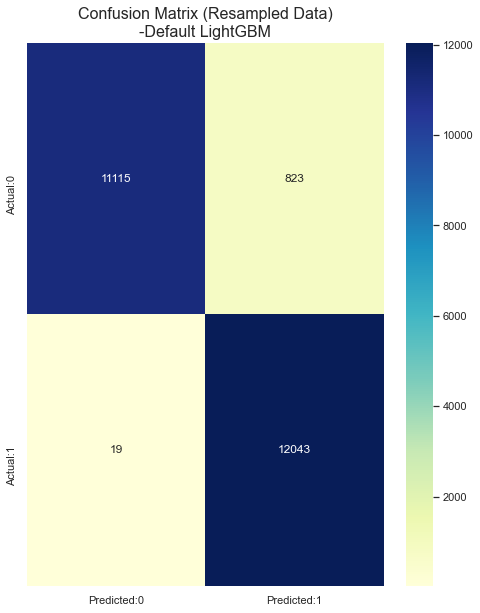

In [19]:
from sklearn.metrics import multilabel_confusion_matrix
sns.set(font_scale = 1)
confmat = multilabel_confusion_matrix(y_true=y_test, y_pred=y_pred_bi,
                           labels=[1])

conf_matrix = pd.DataFrame(data=confmat[0],
                           columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,10))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu").set_title(
    "Confusion Matrix (Resampled Data)\n-Default LightGBM", fontsize=16)
plt.show()

In [20]:
# importances=dict(zip(gbm.feature_names,gbm.feature_importance()))
# importances

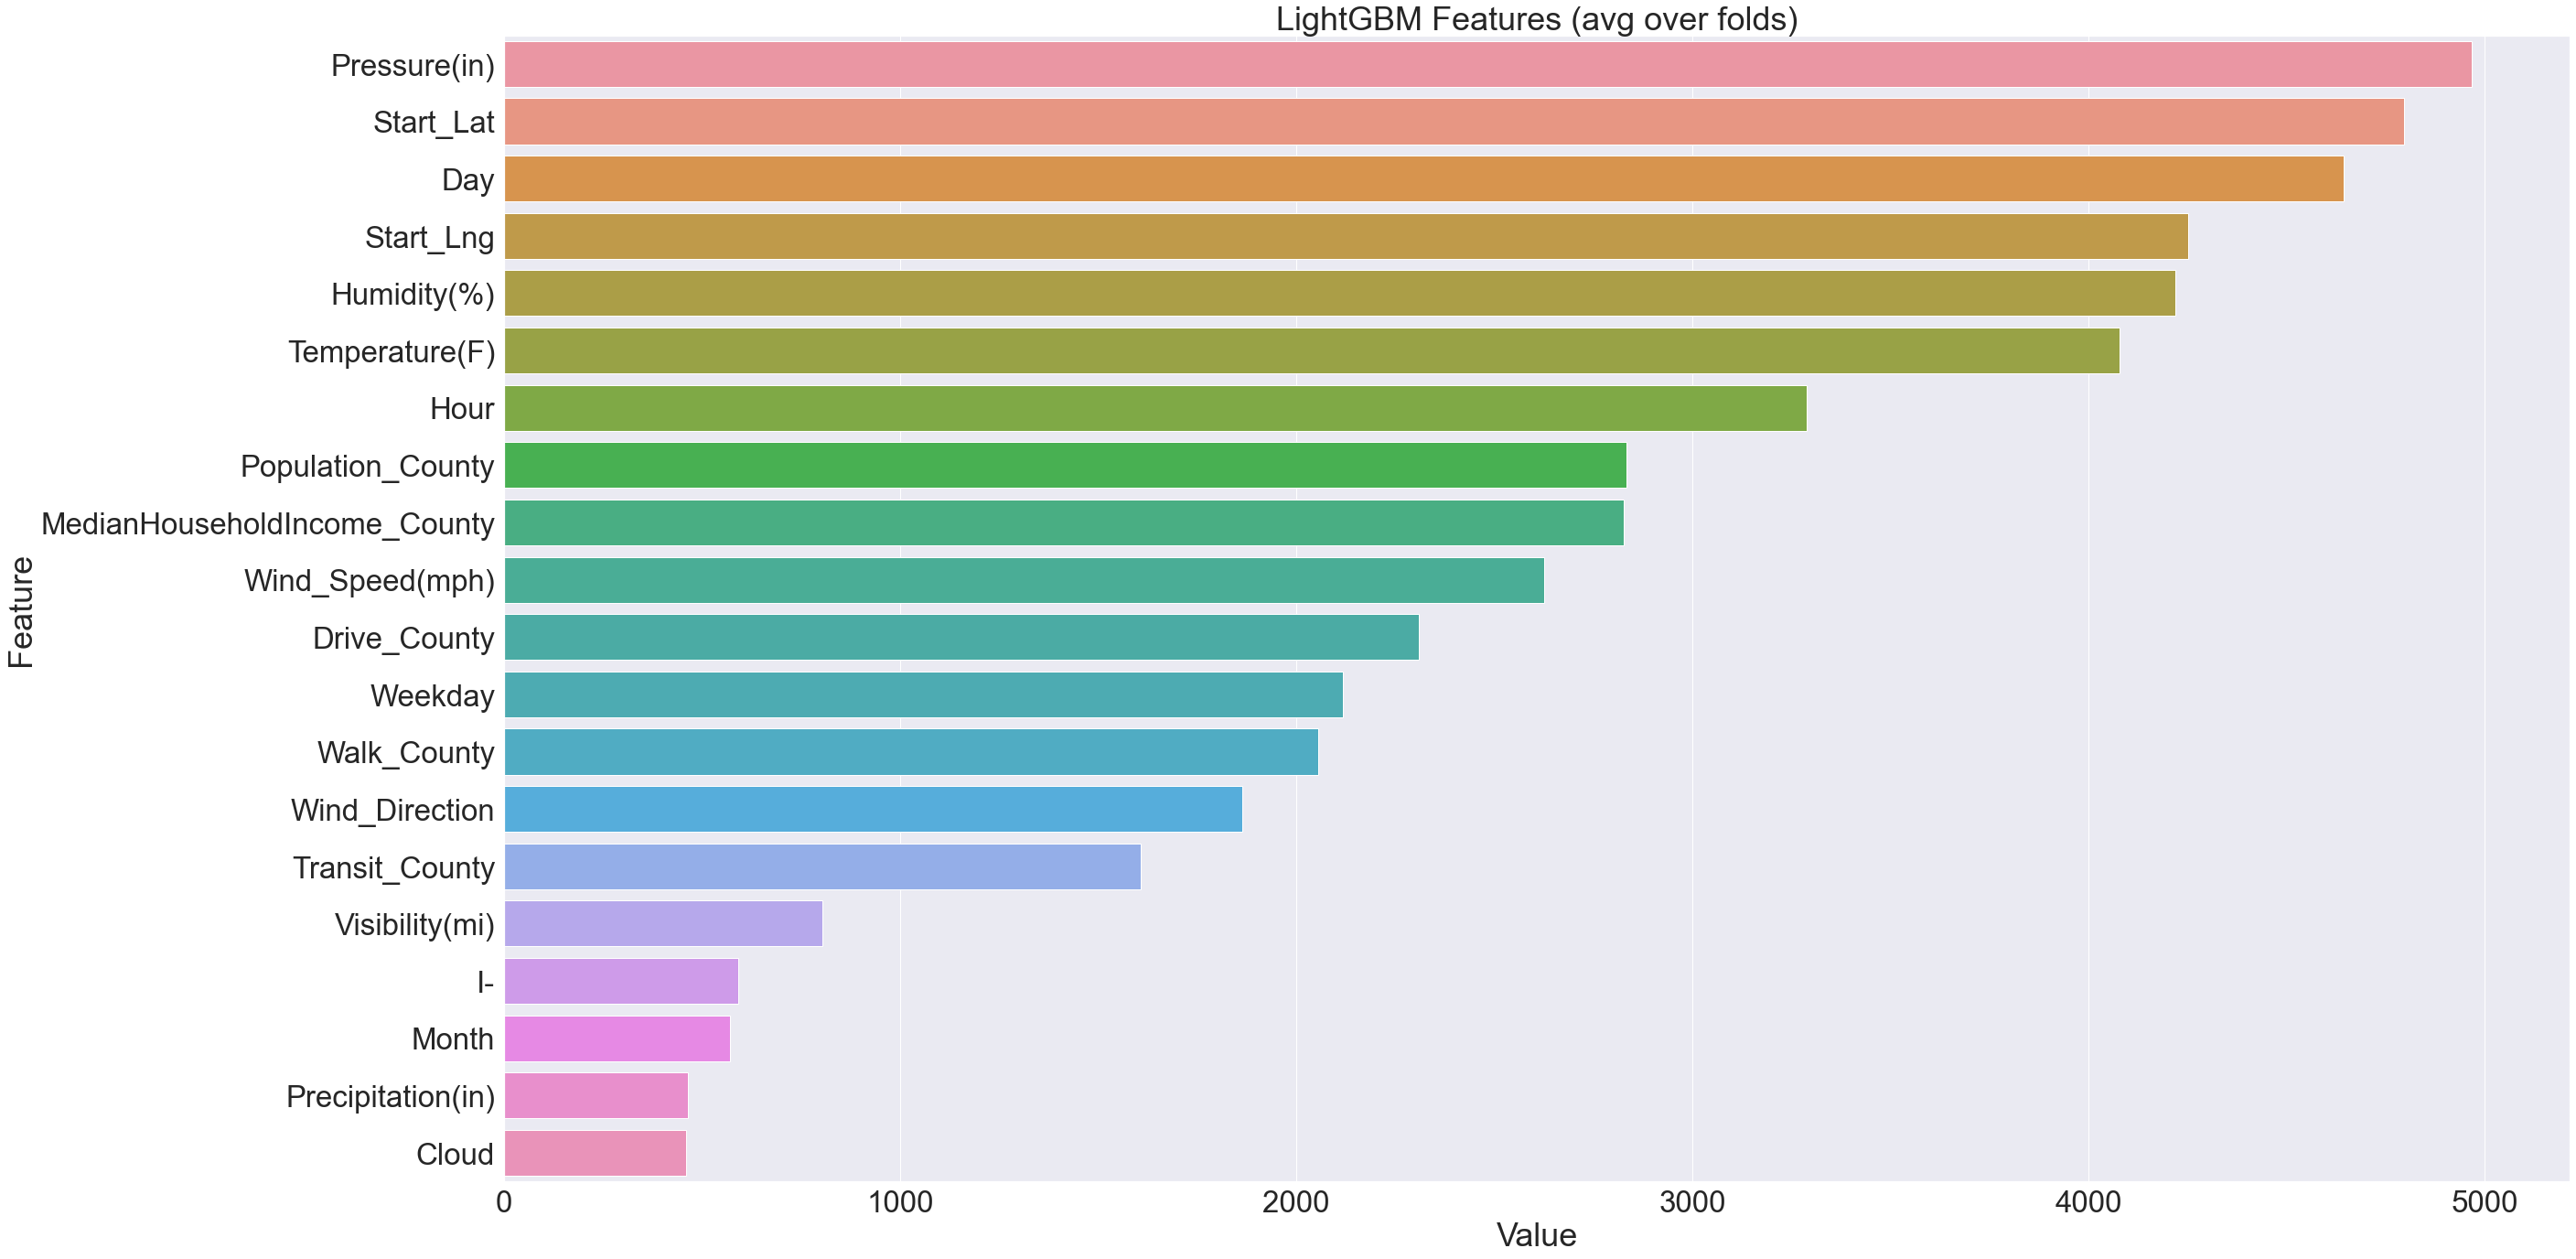

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def plotImp(model, X , num = 20):
    feature_imp = pd.DataFrame({'Value':model.feature_importance(),'Feature':X.columns})
    plt.figure(figsize=(40, 20))
    sns.set(font_scale = 3)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances-01.png')
    plt.show()
plotImp(gbm, X=X , num = 20)